# EECS 731 Project 1: Jimmy Wrangler, Data Explorer
## by Matthew Taylor

In [1]:
# Import required modules

import datetime
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# I selected datasets relating to traffic

# This dataset lists average gas prices by week in New York State
# source: https://catalog.data.gov/dataset/gasoline-retail-prices-weekly-average-by-region-beginning-2007
gas_prices = pd.read_csv('data/New_York_gas_prices.csv')

# This dataset contains the information about car accidents in New York State
# source: https://catalog.data.gov/dataset/motor-vehicle-crashes-case-information-beginning-2009
car_accidents = pd.read_csv('data/New_York_car_accidents.csv')

In [3]:
# We can see the contents of these datasets using the head() function
gas_prices.head()

,Date,New York State Average ($/gal),Albany Average ($/gal),Batavia Average ($/gal),Binghamton Average ($/gal),Buffalo Average ($/gal),Dutchess Average ($/gal),Elmira Average ($/gal),Glens Falls Average ($/gal),Ithaca Average ($/gal),Kingston Average ($/gal),Nassau Average ($/gal),New York City Average ($/gal),Rochester Average ($/gal),Syracuse Average ($/gal),Utica Average ($/gal),Watertown Average ($/gal),White Plains Average ($/gal)
0,07/29/2019,2.88,2.74,2.83,2.79,2.83,2.93,2.77,2.80,2.81,2.78,2.89,3.00,2.83,2.78,2.84,2.81,3.02
1,07/22/2019,2.89,2.76,2.84,2.84,2.85,2.95,2.80,2.81,2.84,2.80,2.90,3.01,2.84,2.80,2.85,2.82,3.03
2,07/15/2019,2.88,2.75,2.84,2.82,2.85,2.94,2.77,2.79,2.82,2.79,2.89,2.99,2.84,2.79,2.84,2.81,3.02
3,07/08/2019,2.88,2.75,2.84,2.80,2.86,2.93,2.78,2.78,2.81,2.80,2.88,2.97,2.85,2.78,2.83,2.81,3.01
4,07/01/2019,2.86,2.73,2.79,2.76,2.85,2.92,2.76,2.76,2.76,2.78,2.86,2.95,2.82,2.77,2.83,2.79,3.00


In [4]:
# This dataset was very large, so some rows had to be omitted to meet GitHub's max file size restriction
car_accidents.head()

,Date,Time,Collision Type Descriptor,Road Descriptor,Road Surface Conditions,Number of Vehicles Involved
0,12/31/2016,17:14,OTHER,Curve and Grade,Wet,1
1,12/31/2016,5:30,SIDESWIPE,Straight and Level,Dry,2
2,12/31/2016,11:02,LEFT TURN (3),Straight and Level,Wet,2
3,12/31/2016,15:20,Unknown,Unknown,Unknown,2
4,12/31/2016,8:52,LEFT TURN (3),Straight and Grade,Dry,2


In [5]:
# There is only partial overlap between the two dataset dates

print('Weekly gas prices from {} to {}'.format(gas_prices.iloc[-1]['Date'], gas_prices.iloc[0]['Date']))
print('Daily car accidents from {} to {}'.format(car_accidents.iloc[-1]['Date'], car_accidents.iloc[0]['Date']))

Weekly gas prices from 10/29/2007 to 07/29/2019
Daily car accidents from 1/1/2014 to 12/31/2016


In [6]:
# Here, I group the number of accidents by week for all dates common between the two datasets

accidents_per_week = {}

for year in range(2014, 2017):
    for week in range(1, 53):
        accidents_per_week['{}/{}'.format(week, year)] = 0
    if year == 2015:
        accidents_per_week['53/2015'] = 0
        
for index, row in car_accidents.iterrows():
    d = datetime.datetime.strptime(row['Date'], '%m/%d/%Y').isocalendar()
    
    week = '{}/{}'.format(d[1], d[0])
    
    accidents_per_week[week] += 1

In [7]:
# Now, I convert the gas prices to a similar format

gas_prices_by_week = {}

for index, row in gas_prices.iterrows():
    d = datetime.datetime.strptime(row['Date'], '%m/%d/%Y').isocalendar()
    
    week = '{}/{}'.format(d[1], d[0])
    
    if week in accidents_per_week.keys():
        gas_prices_by_week[week] = row[1]

In [8]:
# With the two datasets in a common format, I combine them into a single dictionary

df_dict = {'Week': [], 'Average Gas Price': [], 'Number of Car Accidents': []}

for key in accidents_per_week.keys():
    df_dict['Week'].append(key)
    df_dict['Average Gas Price'].append(gas_prices_by_week[key])
    df_dict['Number of Car Accidents'].append(accidents_per_week[key])

In [9]:
# Lastly, I convert the dictionary to a pandas DataFrame

df = pd.DataFrame.from_dict(df_dict)

In [10]:
# Again, the contents of the DataFrame can be viewed using the head() function

df.head()

,Week,Average Gas Price,Number of Car Accidents
0,1/2014,3.68,5359
1,2/2014,3.70,6336
2,3/2014,3.69,6026
3,4/2014,3.67,7142
4,5/2014,3.64,6276


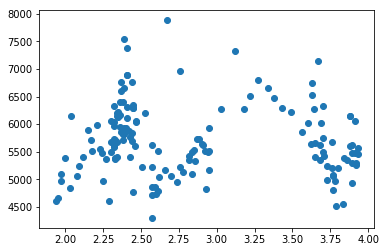

In [11]:
# To demonstrate how this new dataset could be used, I plotted the data

prices = df.iloc[:,1].values
accidents = df.iloc[:,2].values
plt.scatter(prices, accidents)
plt.show()

In [12]:
# Using simple linear regression, we see the number of car accidents tends to decrease as the price of gas increases

r = LinearRegression().fit(prices.reshape(-1, 1), accidents.reshape(-1, 1))
r.coef_

array([[-57.87687726]])